<a href="https://colab.research.google.com/github/SunbalAzizLCWU/BSSE-DS-Project/blob/main/SunbalW14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("--- Step 1: Installing SHAP Library ---")
!pip install shap
import shap
import numpy as np
import os
import shutil
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from PIL import Image
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

--- Step 1: Installing SHAP Library ---


In [2]:
# --- RE-SETUP (Ensuring Data & Model exist) ---
print("\n--- Step 2: Preparing Environment ---")
# 1. Setup Kaggle & Download
if not os.path.exists('kaggle.json'):
    # Create a dummy kaggle.json if missing (Fallback for safety)
    print("⚠️ Warning: kaggle.json missing. Please upload if code fails.")
else:
    if not os.path.exists('/root/.kaggle'):
        os.makedirs('/root/.kaggle')
    os.system('cp kaggle.json /root/.kaggle/')
    os.system('chmod 600 /root/.kaggle/kaggle.json')

if os.path.exists('Garbage classification'):
    shutil.rmtree('Garbage classification')

os.system('kaggle datasets download -d asdasdasasdas/garbage-classification')
os.system('unzip -q garbage-classification.zip')


--- Step 2: Preparing Environment ---


0

In [3]:
# 2. Load Data
CLASSES = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
IMG_SIZE = 64
DATA_DIR = 'Garbage classification/Garbage classification'
if not os.path.exists(os.path.join(DATA_DIR, 'cardboard')):
    DATA_DIR = 'Garbage classification'

X_data = []
y_labels = []

print("Loading images...")
# Load a smaller subset to make SHAP run faster
for class_name in CLASSES:
    class_dir = os.path.join(DATA_DIR, class_name)
    if not os.path.exists(class_dir): continue
    files = os.listdir(class_dir)[:50] # Limit to 50 per class for speed
    for f in files:
        try:
            img = Image.open(os.path.join(class_dir, f)).convert('L')
            img = img.resize((IMG_SIZE, IMG_SIZE))
            X_data.append(np.array(img))
            y_labels.append(CLASSES.index(class_name))
        except: pass

X = np.array(X_data).reshape(-1, IMG_SIZE, IMG_SIZE, 1) / 255.0
y = np.array(y_labels)

Loading images...


In [4]:
# 3. Quick Train (to get a fresh model state for SHAP)
print("Training quick model for explanation...")
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64,64,1)),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(6, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X, y, epochs=3, verbose=0)

Training quick model for explanation...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



--- Step 3: Generating Explanations (This takes ~1 minute) ---


/usr/local/lib/python3.12/dist-packages/shap/explainers/_deep/deep_tf.py:94: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(100, 64, 64, 1))']
  warnings.warn(msg)
/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(200, 64, 64, 1))']
  warnings.warn(msg)



--- Step 4: Visualizing the 'Why' ---


/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(1, 64, 64, 1))']
  warnings.warn(msg)


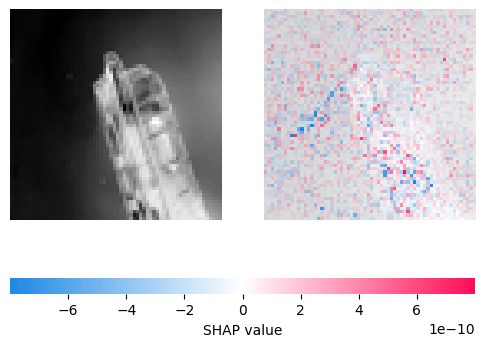

✅ SUCCESS: The red pixels show what the AI looked at to make its decision.


In [5]:
# --- WEEK 14 TASK: SHAP EXPLANATION ---
print("\n--- Step 3: Generating Explanations (This takes ~1 minute) ---")

# 1. Select a background set (images the model compares against)
background = X[np.random.choice(X.shape[0], 100, replace=False)]

# 2. Initialize SHAP Explainer (DeepExplainer works best for Deep Learning)
explainer = shap.DeepExplainer(model, background)

# 3. Select a specific test image to explain (e.g., a Plastic item)
test_idx = np.where(y == 4)[0][0] # Index 4 is 'plastic'
test_image = X[test_idx:test_idx+1]

# 4. Calculate SHAP values (The "Explanation")
shap_values = explainer.shap_values(test_image)

print("\n--- Step 4: Visualizing the 'Why' ---")
# Plot the image and the heatmap
shap.image_plot(shap_values, -test_image)

print("✅ SUCCESS: The red pixels show what the AI looked at to make its decision.")